# Lab Assignment 1 
### Learning and generalisation in feed-forward networks — from perceptron learning to backprop

### 3. Part I
####  3.1 Classification with a single-layer perceptron
##### 3.1.1 Generation of linearly-separable data

In [171]:
import numpy as np
import matplotlib.pyplot as plt

In [172]:
#Draw two sets of points/patterns in 2D from multivariate normal distribution
def generatePattern(n,shuffle=1, verbose=1, pattern=1):
    
   
    mu_A = np.array([1.0, 0.3])
    mu_B = np.array([0.0, -0.1])
    sigma_A = 0.2
    sigma_B = 0.3

    class_A = np.concatenate((np.multiply(np.random.normal(0,1,(1,n)),sigma_A) +  mu_A[0],np.multiply(np.random.normal(0,1,(1,n)),sigma_A) +  mu_A[1]))
    class_B = np.concatenate((np.multiply(np.random.normal(0,1,(1,n)),sigma_B) +  mu_B[0],np.multiply(np.random.normal(0,1,(1,n)),sigma_B) +  mu_A[1]))

    if shuffle:
        
        patterns=np.concatenate((class_A,class_B),axis=1)
        patterns = np.concatenate((patterns,np.ones((1,2*n))))
        targets=np.concatenate((np.ones(n),-np.ones(n)))
        i = np.arange(patterns.shape[1])
        np.random.shuffle(i)
        patterns=patterns[:,i]
        targets=targets[i]
        #print(patterns)
        #print(targets)
    else:
        patterns = np.concatenate((class_A,class_B),axis=1)
        targets = np.array([np.ones(n,),-np.ones(n,)])
        targets = np.ravel(targets)
    
    if verbose:
        #Plotting classes if desired
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt.legend(handles=[plt_A, plt_B])
        plt.show()
    
    
    
    if pattern:
        return patterns, targets
    else:
        return class_A, class_B
    

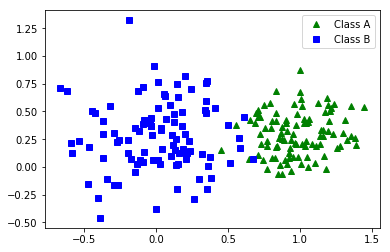

In [173]:
class_A, class_B = generatePattern(100,shuffle=1,pattern=0)

# 3.1.3 Classification of samples that are not linearly separable

In [174]:
#Randomly initalize weight matrix W
def weights_init(n_dim,n_points,scale):
    W = scale*np.random.randn(n_dim,n_points)
    return W


In [175]:
def error(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((T-Y)**2))

def update_weights_delta_rule(eta,T,W,X):
    H = np.matmul(W,X)
    err = error(T,H)
    dW = -eta*np.matmul(H-T,np.transpose(X))
    return dW, err

def update_weights_perceptron(eta,T,W,X):
    H = np.matmul(W,X)
    Y = np.sign(H)
    err = error(T,Y)
    dW = -eta*np.matmul((Y-T),np.transpose(X))
    #dW = eta*err*X
    return dW, err

def update_weights_delta_rule_sequential(eta,X,T,W):
    weights = 0
    err = []
    for i in range(len(T)):
        #X1_sample = X[0][i]
        #X2_sample = X[1][i]
        #X3_sample = X[2][i]
        X_sample = X[:,i]
        T_sample = T[i]
        
        H = np.matmul(W,X_sample)
        dW = -eta*(H-T_sample)*np.transpose(X_sample)
        #H_s.append(H)
        err.append((H-T_sample)**2)
        
        weights = weights+dW
    print(weights)
    err = np.mean(err)
    print(err)
    
    return weights, err

def train_network(eta,X,W,T,epochs,plot=1,sequential=False):
    
    errors = np.zeros((2,epochs))
    W_perceptron = W
    W_delta_rule = W
    #print(W_perceptron)
    #print(W_perceptron[0][2])
    if plot:
        linespace = np.linspace(-2,2,10)
        line_perceptron = get_decisionBound(W_perceptron)
        line_delta_rule = get_decisionBound(W_delta_rule)
        
        plt.subplot(211)
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt_line_perceptron, = plt.plot(linespace,line_perceptron,'k',label='DecisionBoundary')
        plt.legend(handles=[plt_A, plt_B, plt_line_perceptron])
        plt.axis([-2.5,2.5,-2,2])
        plt.title('Perceptron Learning Rule')
        
        plt.subplot(212)
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt_line_delta_rule, = plt.plot(linespace,line_delta_rule,'k',label='DecisionBoundary')
        plt.legend(handles=[plt_A, plt_B, plt_line_delta_rule])
        plt.axis([-2.5,2.5,-2,2])
        plt.title('Delta Learning Rule')
        
        
        
    
    for i in range(epochs):
        
        if sequential:
            dw_delta_rule, err_delta_rule = update_weights_delta_rule_sequential(eta,X,T,W_delta_rule)
        else:
            dw_delta_rule, err_delta_rule = update_weights_delta_rule(eta,T,W_delta_rule,X)
        
        dW_perceptron, err_perceptron = update_weights_perceptron(eta,T,W_perceptron,X)
        
        W_delta_rule = dw_delta_rule + W_delta_rule
        W_perceptron = dW_perceptron + W_perceptron
        print(W_perceptron)
        
        errors[0,i] = err_perceptron
        errors[1,i] = err_delta_rule
        
        if plot:
            line_perceptron = get_decisionBound(W_perceptron)
            line_delta_rule = get_decisionBound(W_delta_rule)
    
            #plt_line_perceptron.set_ydata(line_perceptron)
            #plt_line_delta_rule.set_ydata(line_delta_rule)
            
            #plt.ion()
            #plt.draw()
            #plt_line_perceptron.remove()
            #plt_line_delta_rule.remove()
            
            plt.subplot(211)
            plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
            plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
            plt_line_perceptron, = plt.plot(linespace,line_perceptron,'k',label='DecisionBoundary')
            plt.legend(handles=[plt_A, plt_B, plt_line_perceptron])
            plt.axis([-2.5,2.5,-2,2])
            plt.title('Perceptron Learning Rule')
        
            plt.subplot(212)
            plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
            plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
            plt_line_delta_rule, = plt.plot(linespace,line_delta_rule,'k',label='DecisionBoundary')
            plt.legend(handles=[plt_A, plt_B, plt_line_delta_rule])
            plt.axis([-2.5,2.5,-2,2])
            plt.title('Delta Learning Rule')
            
            plt.show()
            plt.pause(0.1)
    
            #print(linespace.shape,line.shape)
    
        
    
    #plt.show()
            
    return W_perceptron, W_delta_rule, errors


In [176]:
def get_decisionBound(w):
    #print(w.shape)
    slope_vec = np.array([w[0][1],-w[0][0]])
    slope = slope_vec[1]/slope_vec[0]
    intercept = w[0][2]/np.linalg.norm(w)
    
    linespace = np.linspace(-2,2,10)
    line = slope*linespace + intercept
    y=(-1/(w[0][1]))*(w[0][0]*line+(w[0][2]))
    return y

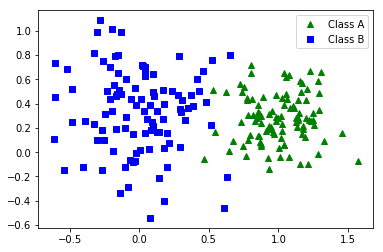

[[ 0.19013509 -0.00518398  0.03068101]]


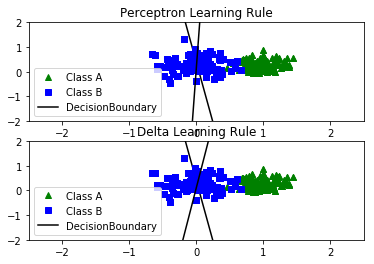

[[ 0.17020174 -0.04423007 -0.10531899]]


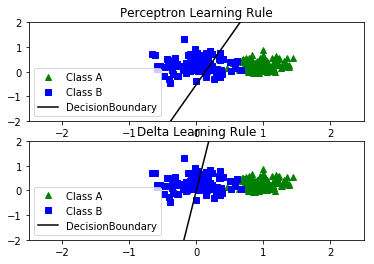

[[ 0.17809142 -0.03601278 -0.09331899]]


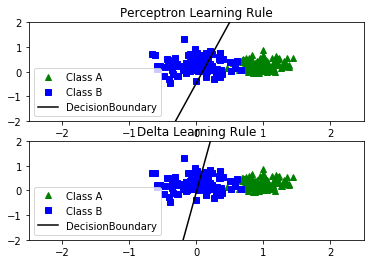

[[ 0.17869137 -0.03343262 -0.09131899]]


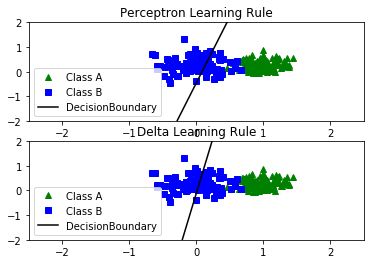

[[ 0.17820107 -0.03118939 -0.09131899]]


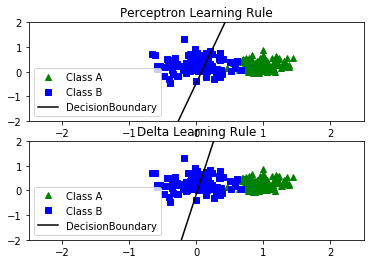

[[ 0.17771077 -0.02894617 -0.09131899]]


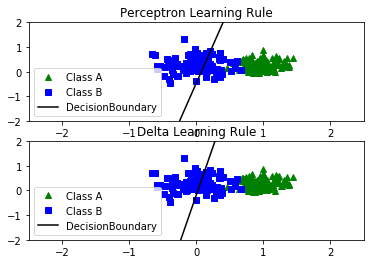

[[ 0.1759154  -0.02830449 -0.09331899]]


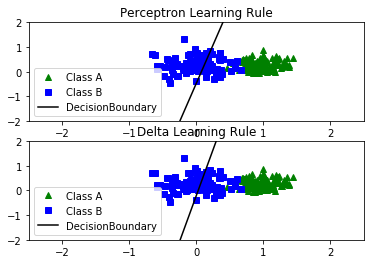

[[ 0.17651535 -0.02572433 -0.09131899]]


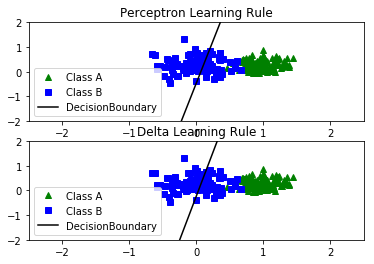

[[ 0.17471999 -0.02508265 -0.09331899]]


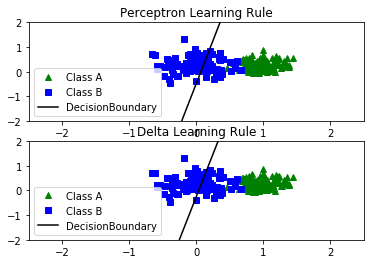

[[ 0.17401487 -0.02410405 -0.09331899]]


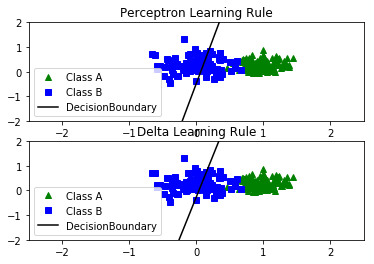

[[ 0.17330975 -0.02312544 -0.09331899]]


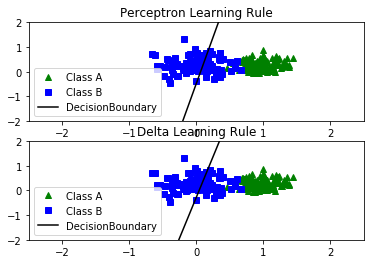

[[ 0.17260463 -0.02214683 -0.09331899]]


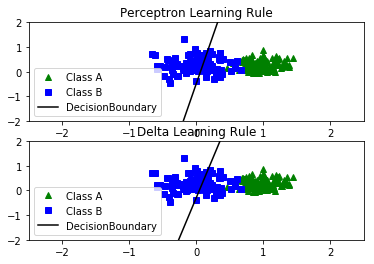

[[ 0.17189951 -0.02116823 -0.09331899]]


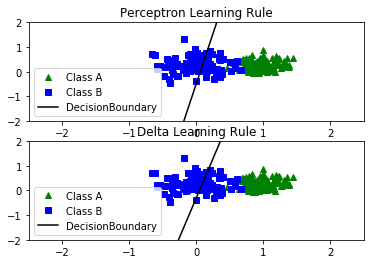

[[ 0.1711944  -0.02018962 -0.09331899]]


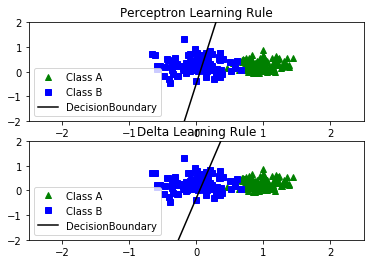

[[ 0.17048928 -0.01921102 -0.09331899]]


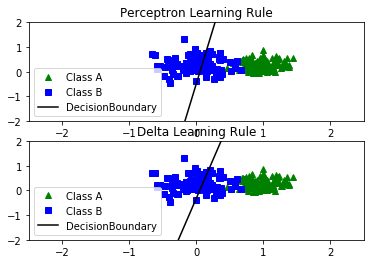

[[ 0.16978416 -0.01823241 -0.09331899]]


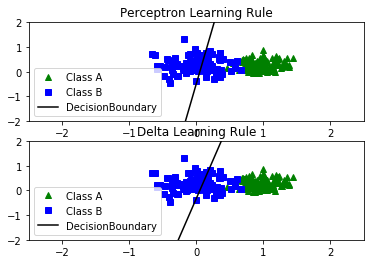

[[ 0.16907904 -0.01725381 -0.09331899]]


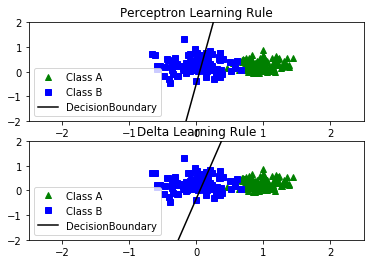

[[ 0.16837392 -0.0162752  -0.09331899]]


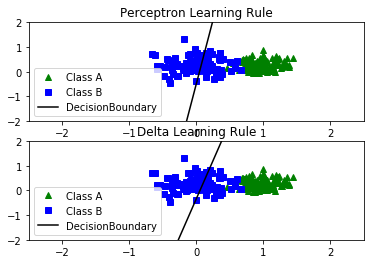

[[ 0.16766881 -0.0152966  -0.09331899]]


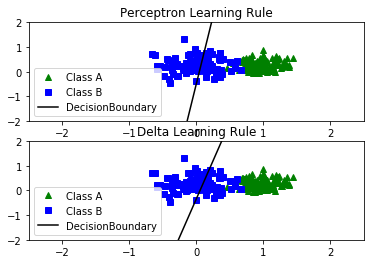

[[ 0.16696369 -0.01431799 -0.09331899]]


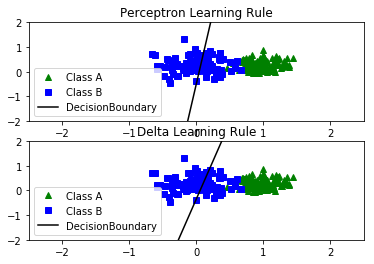

In [177]:
#Perceptron and Delta learning rule
n = 100
eta = 1e-3
epochs = 20
n_outputs = 1
n_dim = 3
scale = 1e-2

X, T = generatePattern(n,pattern=1)
W = weights_init(n_outputs,n_dim,scale)

W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)



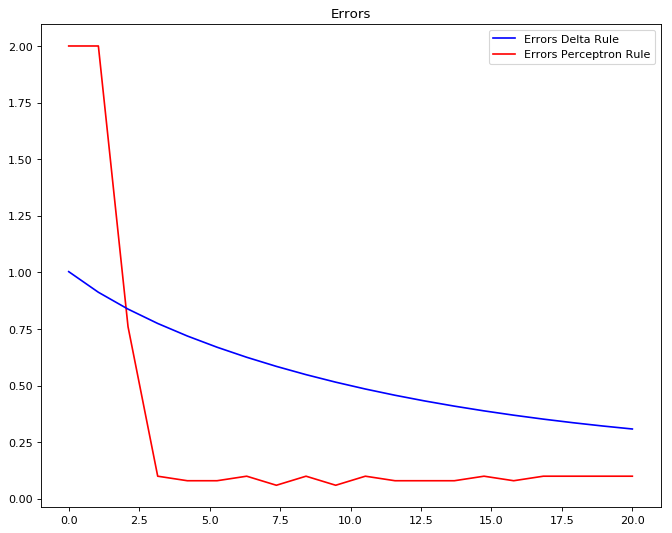

In [162]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt_errs_perceptron, = plt.plot(np.linspace(0,epochs,epochs),errors[0][:],'r', label='Errors Perceptron Rule')
plt_errs_delta_rule, = plt.plot(np.linspace(0,epochs,epochs),errors[1][:],'b',label='Errors Delta Rule')
#fig.add_plot(plt_errs_perceptron)
plt.legend(handles=[plt_errs_delta_rule,plt_errs_perceptron])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()

#print(errors)

# REMOVE 50% of each!


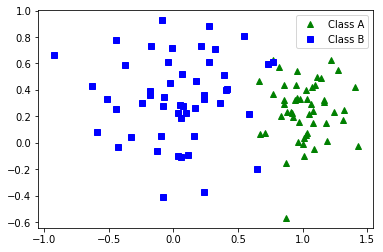

[[ 0.02099292 -0.02990804 -0.05499922]]


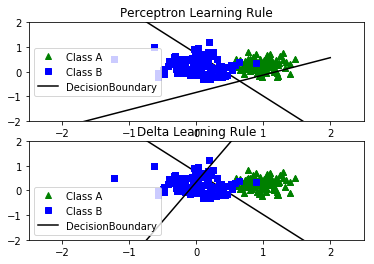

[[ 0.12255122 -0.00545856  0.04500078]]


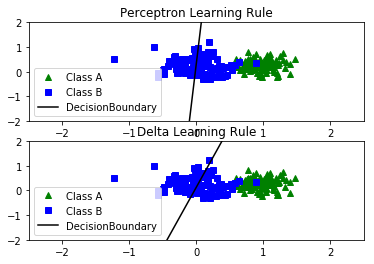

[[ 0.11056255 -0.03304634 -0.03899922]]


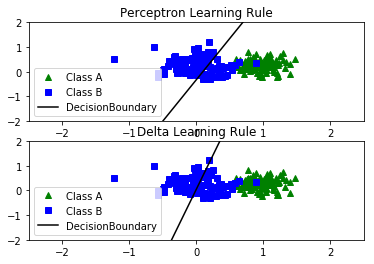

[[ 0.10508576 -0.03550842 -0.04699922]]


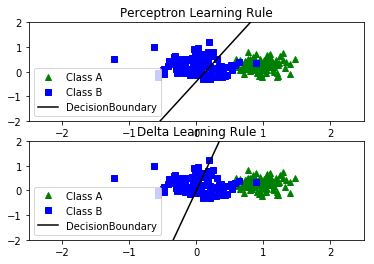

[[ 0.09960896 -0.03797049 -0.05499922]]


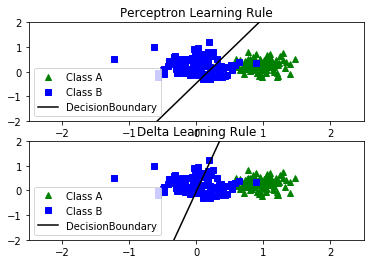

[[ 0.10118176 -0.03538717 -0.05299922]]


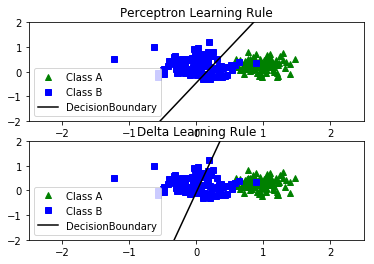

[[ 0.09966328 -0.03528047 -0.05499922]]


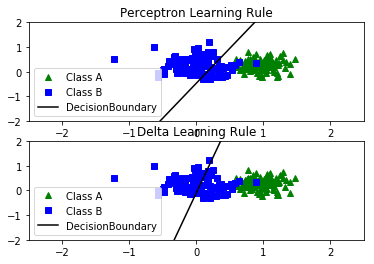

[[ 0.0981448  -0.03517376 -0.05699922]]


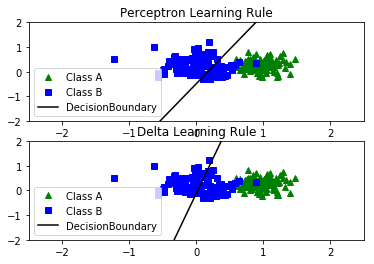

[[ 0.09971759 -0.03259044 -0.05499922]]


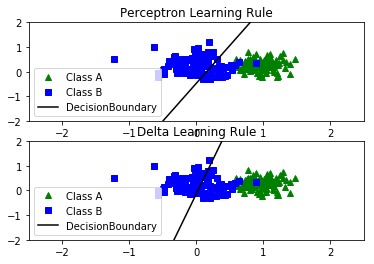

[[ 0.09819912 -0.03248373 -0.05699922]]


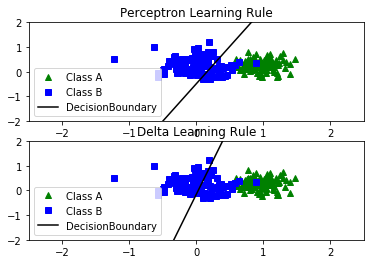

[[ 0.09977191 -0.02990042 -0.05499922]]


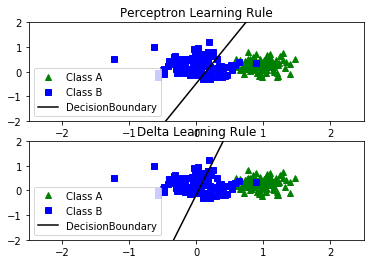

[[ 0.09679079 -0.03099134 -0.05899922]]


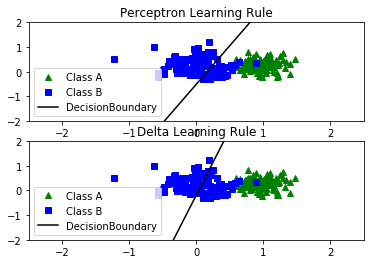

[[ 0.09836358 -0.02840802 -0.05699922]]


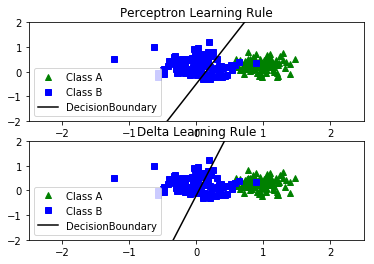

[[ 0.0968451  -0.02830131 -0.05899922]]


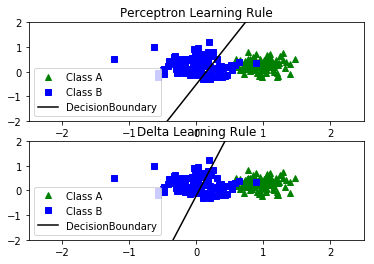

[[ 0.09841789 -0.025718   -0.05699922]]


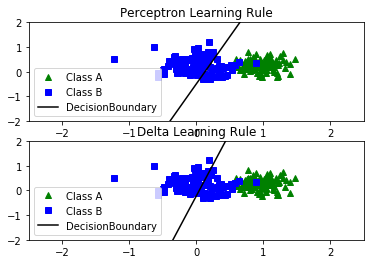

[[ 0.09689942 -0.02561129 -0.05899922]]


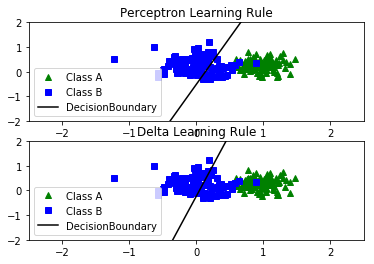

[[ 0.09692768 -0.02425527 -0.05899922]]


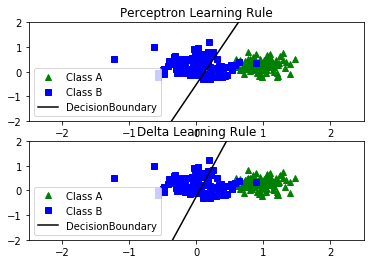

[[ 0.09540921 -0.02414857 -0.06099922]]


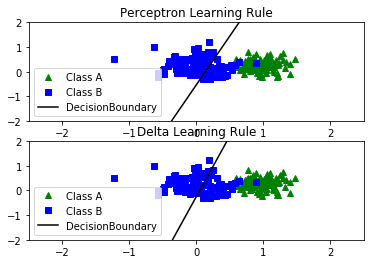

[[ 0.096982   -0.02156525 -0.05899922]]


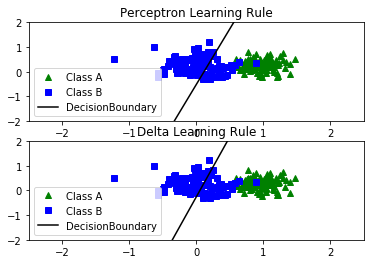

[[ 0.09546352 -0.02145854 -0.06099922]]


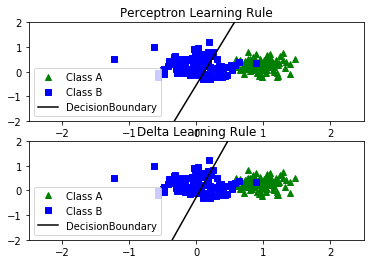

In [163]:
eta = 1e-3
epochs = 20
n_outputs = 1
n_dim = 3
scale = 1e-2
n = 50
X, T = generatePattern(n,pattern=1)
W = weights_init(n_outputs,n_dim,scale)
W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)

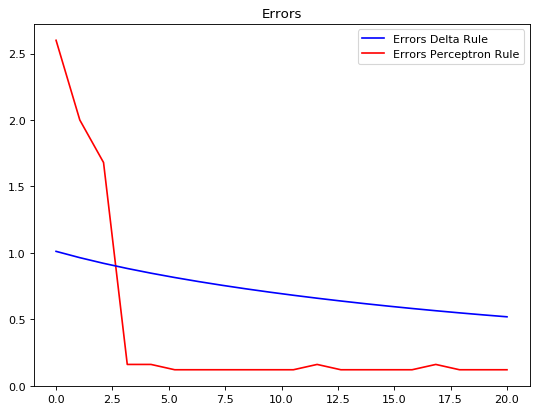

In [164]:
fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
plt_errs_perceptron, = plt.plot(np.linspace(0,epochs,epochs),errors[0][:],'r', label='Errors Perceptron Rule')
plt_errs_delta_rule, = plt.plot(np.linspace(0,epochs,epochs),errors[1][:],'b',label='Errors Delta Rule')
#fig.add_plot(plt_errs_perceptron)
plt.legend(handles=[plt_errs_delta_rule,plt_errs_perceptron])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()

# Use 50% of A but all B:

In [182]:
#Draw two sets of points/patterns in 2D from multivariate normal distribution
def generatePattern(n,shuffle=1, verbose=1, pattern=1):
    
   
    mu_A = np.array([1.0, 0.3])
    mu_B = np.array([0.0, -0.1])
    sigma_A = 0.2
    sigma_B = 0.3

    class_A = np.concatenate((np.multiply(np.random.normal(0,1,(1,int(n/2))),sigma_A) +  mu_A[0],np.multiply(np.random.normal(0,1,(1,int(n/2))),sigma_A) +  mu_A[1]))
    class_B = np.concatenate((np.multiply(np.random.normal(0,1,(1,n)),sigma_B) +  mu_B[0],np.multiply(np.random.normal(0,1,(1,n)),sigma_B) +  mu_A[1]))

    if shuffle:
        
        patterns=np.concatenate((class_A,class_B),axis=1)
        patterns = np.concatenate((patterns,np.ones((1,int(1.5*n)))))
        targets=np.concatenate((np.ones(n),-np.ones(n)))
        i = np.arange(patterns.shape[1])
        np.random.shuffle(i)
        patterns=patterns[:,i]
        targets=targets[i]
        #print(patterns)
        #print(targets)
    else:
        patterns = np.concatenate((class_A,class_B),axis=1)
        targets = np.array([np.ones(n,),-np.ones(n,)])
        targets = np.ravel(targets)
    
    if verbose:
        #Plotting classes if desired
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt.legend(handles=[plt_A, plt_B])
        plt.show()
    
    
    
    if pattern:
        return patterns, targets
    else:
        return class_A, class_B
    

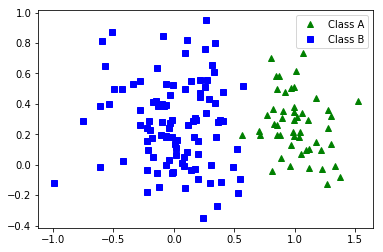

In [183]:
class_A, class_B = generatePattern(100,shuffle=1,pattern=0)

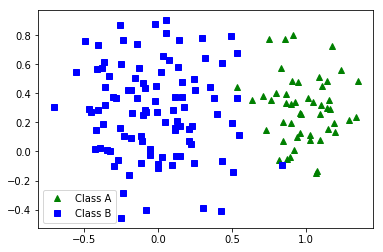

[[0.09401114 0.06832842 0.18028127]]


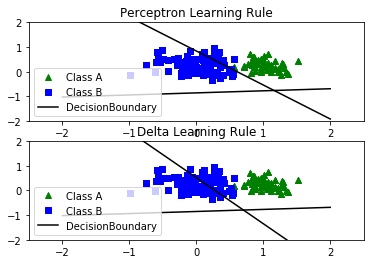

[[0.09558745 0.0385404  0.08028127]]


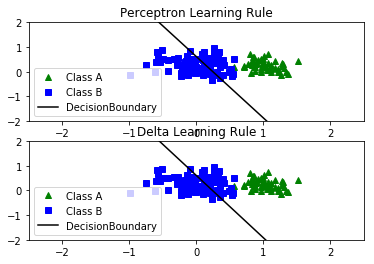

[[ 0.09716377  0.00875237 -0.01971873]]


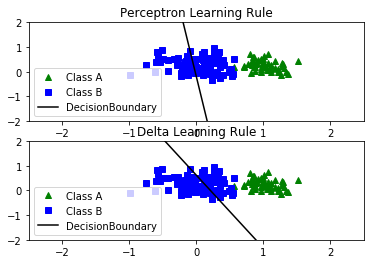

[[0.07541891 0.02239949 0.03028127]]


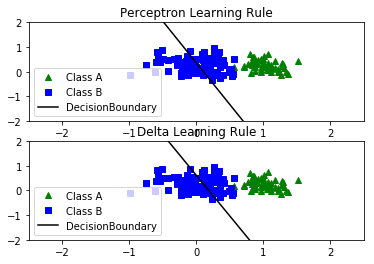

[[ 0.07471773 -0.0067337  -0.06571873]]


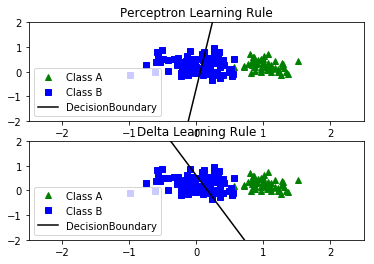

[[0.09854671 0.03350602 0.06828127]]


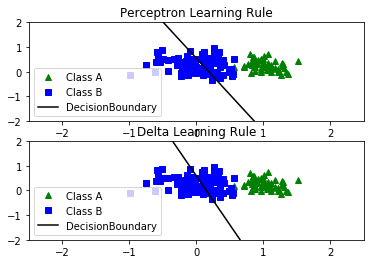

[[ 0.10012302  0.00371799 -0.03171873]]


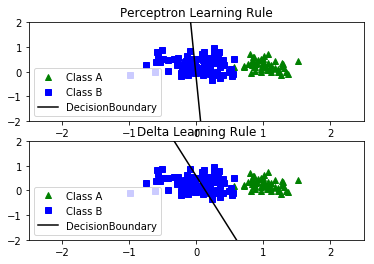

[[0.08283832 0.02132221 0.03828127]]


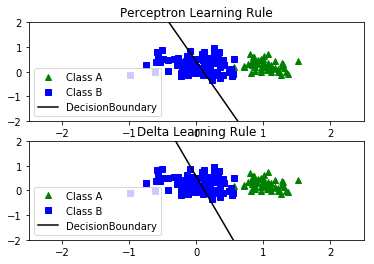

[[ 0.0829983  -0.00785058 -0.05971873]]


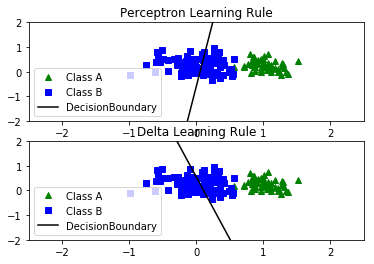

[[0.08471191 0.02324004 0.04828127]]


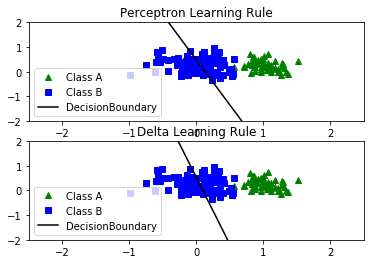

[[ 0.08487189 -0.00593275 -0.04971873]]


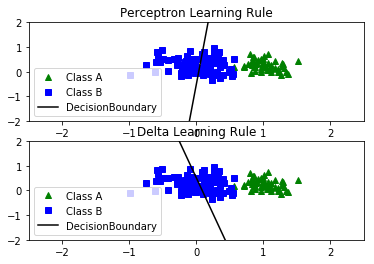

[[0.08093888 0.02184459 0.05028127]]


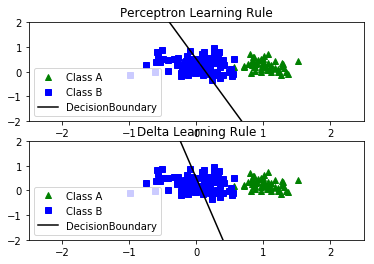

[[ 0.08109886 -0.0073282  -0.04771873]]


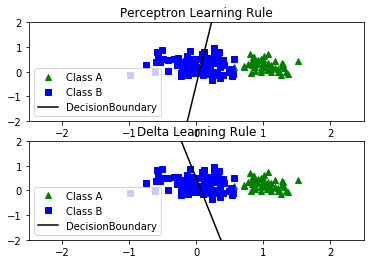

[[0.07716586 0.02044914 0.05228127]]


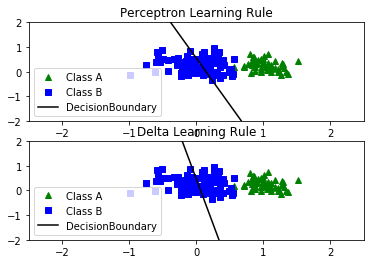

[[ 0.07874217 -0.00933888 -0.04771873]]


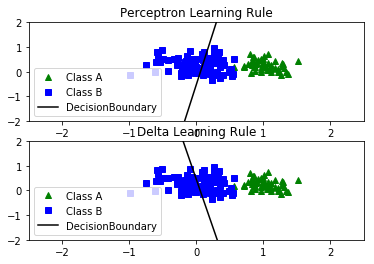

[[0.07607667 0.01913996 0.05428127]]


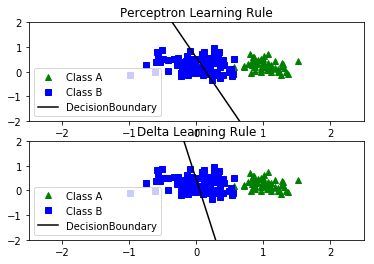

[[ 0.07765298 -0.01064807 -0.04571873]]


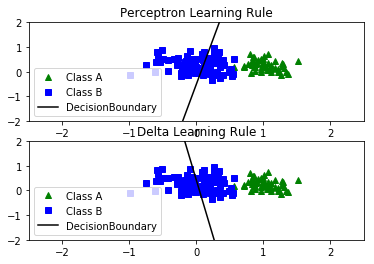

[[0.07498748 0.01783078 0.05628127]]


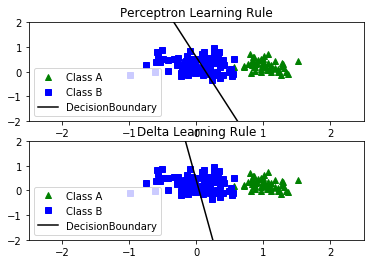

[[ 0.0765638  -0.01195725 -0.04371873]]


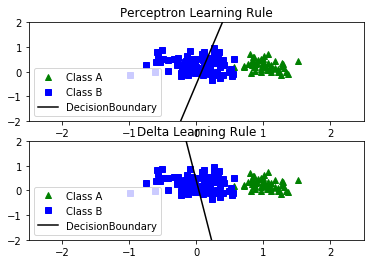

[[0.07263079 0.01582009 0.05628127]]


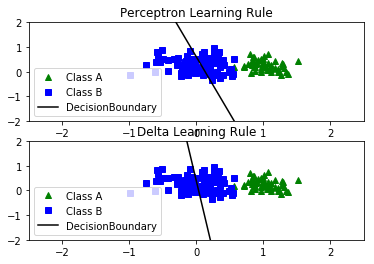

In [184]:
eta = 1e-3
epochs = 20
n_outputs = 1
n_dim = 3
scale = 1e-2
n = 100
X, T = generatePattern(n,pattern=1)
W = weights_init(n_outputs,n_dim,scale)
W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)

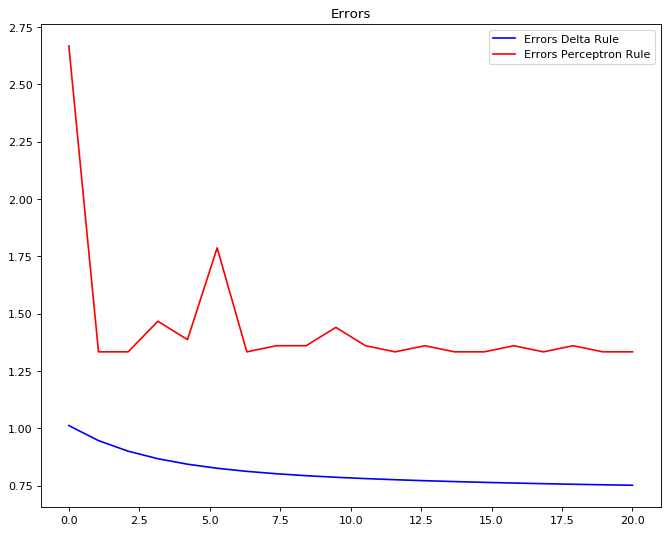

In [185]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt_errs_perceptron, = plt.plot(np.linspace(0,epochs,epochs),errors[0][:],'r', label='Errors Perceptron Rule')
plt_errs_delta_rule, = plt.plot(np.linspace(0,epochs,epochs),errors[1][:],'b',label='Errors Delta Rule')
#fig.add_plot(plt_errs_perceptron)
plt.legend(handles=[plt_errs_delta_rule,plt_errs_perceptron])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()

# 50% of B but 100% of A

In [38]:
#Draw two sets of points/patterns in 2D from multivariate normal distribution
def generatePattern(n,shuffle=1, verbose=1, pattern=1):
    
   
    mu_A = np.array([1.0, 0.3])
    mu_B = np.array([0.0, -0.1])
    sigma_A = 0.2
    sigma_B = 0.3

    class_A = np.concatenate((np.multiply(np.random.normal(0,1,(1,int(n))),sigma_A) +  mu_A[0],np.multiply(np.random.normal(0,1,(1,int(n))),sigma_A) +  mu_A[1]))
    class_B = np.concatenate((np.multiply(np.random.normal(0,1,(1,int(n/2))),sigma_B) +  mu_B[0],np.multiply(np.random.normal(0,1,(1,int(n/2))),sigma_B) +  mu_A[1]))

    if shuffle:
        
        patterns=np.concatenate((class_A,class_B),axis=1)
        patterns = np.concatenate((patterns,np.ones((1,2*n))))
        targets=np.concatenate((np.ones(n),-np.ones(n)))
        i = np.arange(patterns.shape[1])
        np.random.shuffle(i)
        patterns=patterns[:,i]
        targets=targets[i]
        #print(patterns)
        #print(targets)
    else:
        patterns = np.concatenate((class_A,class_B),axis=1)
        targets = np.array([np.ones(n,),-np.ones(n,)])
        targets = np.ravel(targets)
    
    if verbose:
        #Plotting classes if desired
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt.legend(handles=[plt_A, plt_B])
        plt.show()
    
    
    
    if pattern:
        return patterns, targets
    else:
        return class_A, class_B
    

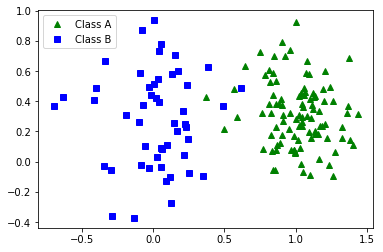

In [39]:
eta = 1e-3
epochs = 20
n_outputs = 1
n_dim = 3
scale = 1e-2
n = 100
X, T = generatePattern(n,pattern=1)
W = weights_init(n_outputs,n_dim,scale)
W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)

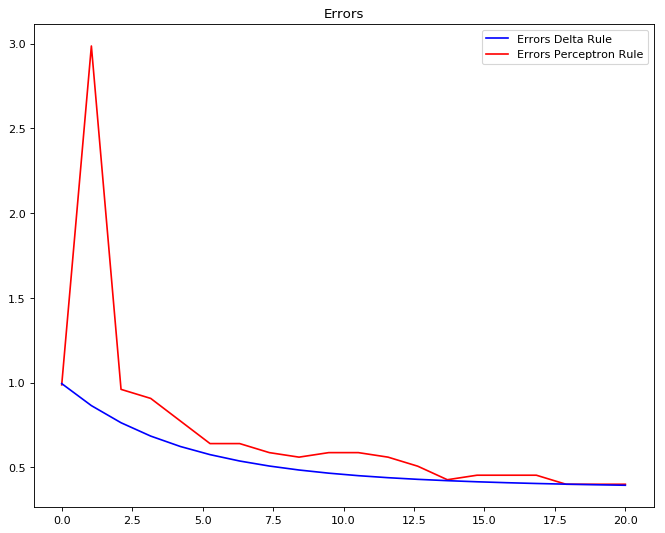

In [40]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt_errs_perceptron, = plt.plot(np.linspace(0,epochs,epochs),errors[0][:],'r', label='Errors Perceptron Rule')
plt_errs_delta_rule, = plt.plot(np.linspace(0,epochs,epochs),errors[1][:],'b',label='Errors Delta Rule')
#fig.add_plot(plt_errs_perceptron)
plt.legend(handles=[plt_errs_delta_rule,plt_errs_perceptron])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()

# 20% from A where class_A(1,:) < 0 and 80% from class_A(1,:)>0

In [192]:
#Draw two sets of points/patterns in 2D from multivariate normal distribution
def generatePattern(n,shuffle=1, verbose=1, pattern=1):
    
   
    mu_A = np.array([1.0, 0.3])
    mu_B = np.array([0.0, -0.1])
    sigma_A = 0.2
    sigma_B = 0.3
    
    class_A = np.concatenate((np.multiply(np.random.normal(0,1,(1,n)),sigma_A) +  mu_A[0],np.multiply(np.random.normal(0,1,(1,n)),sigma_A) +  mu_A[1]))
    class_B = np.concatenate((np.multiply(np.random.normal(0,1,(1,n)),sigma_B) +  mu_B[0],np.multiply(np.random.normal(0,1,(1,n)),sigma_B) +  mu_A[1]))
    c_a = np.zeros((2,20))
    c_b = np.zeros((2,80))
    #print(class_A.shape)
    a_i = 0
    b_i = 0
    for i in range(n):
        if class_B[1,i] < 0 and c_a[1,19] == 0:
            
            c_a[:,a_i] = class_B[:,i]
            a_i+= 1
        elif class_B[1,i] >0 and c_b[1,19] == 0:
            c_b[:,b_i] = class_B[:,i]
            b_i+=1
    
    class_A = c_a
    class_B = c_b
    #print(c_a)
    if shuffle:
        #print(class_A.shape)
        #print(class_B.shape)
        patterns=np.concatenate((class_A,class_B),axis=1)
        patterns = np.concatenate((patterns,np.ones((1,100))))
        targets=np.concatenate((np.ones(n),-np.ones(n)))
        i = np.arange(patterns.shape[1])
        np.random.shuffle(i)
        patterns=patterns[:,i]
        targets=targets[i]
        #print(patterns)
        #print(targets)
    else:
        patterns = np.concatenate((class_A,class_B),axis=1)
        targets = np.array([np.ones(n,),-np.ones(n,)])
        targets = np.ravel(targets)
    
    if verbose:
        #Plotting classes if desired
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt.legend(handles=[plt_A, plt_B])
        plt.show()
    
    
    
    if pattern:
        return patterns, targets
    else:
        return class_A, class_B
    

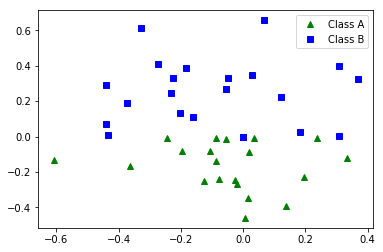

[[-0.00667369 -0.00081794  0.19120787]]


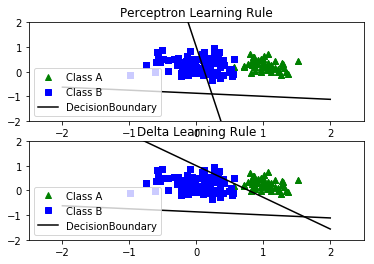

[[-0.00667369 -0.00081794  0.19120787]]


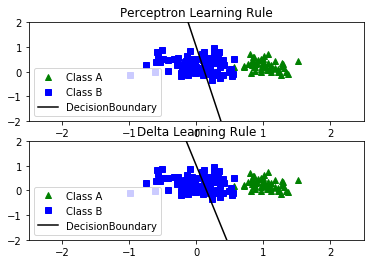

[[-0.00667369 -0.00081794  0.19120787]]


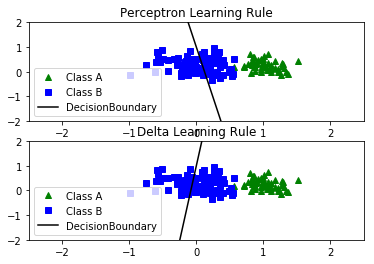

[[-0.00667369 -0.00081794  0.19120787]]


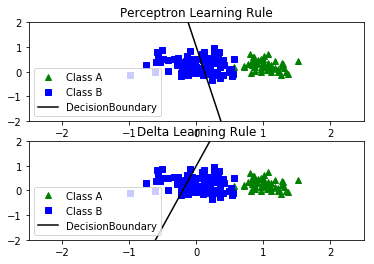

[[-0.00667369 -0.00081794  0.19120787]]


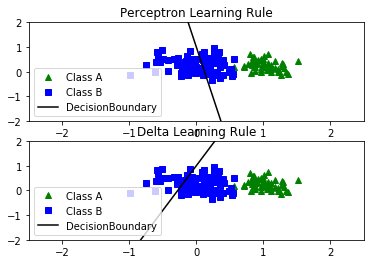

[[-0.00667369 -0.00081794  0.19120787]]


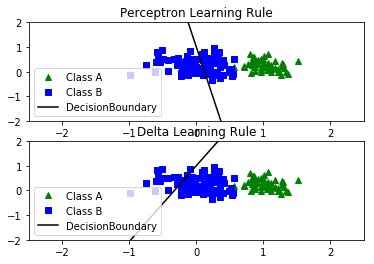

[[-0.00667369 -0.00081794  0.19120787]]


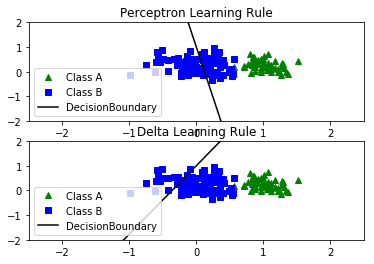

[[-0.00667369 -0.00081794  0.19120787]]


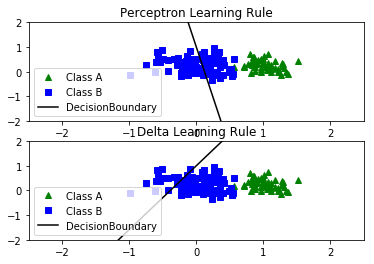

[[-0.00667369 -0.00081794  0.19120787]]


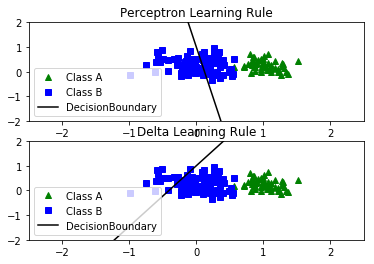

[[-0.00667369 -0.00081794  0.19120787]]


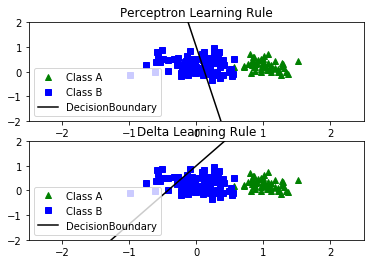

[[-0.00667369 -0.00081794  0.19120787]]


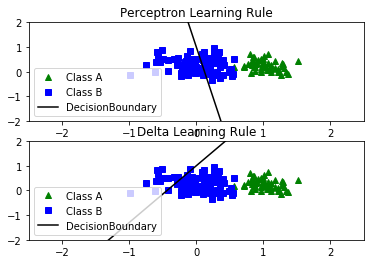

[[-0.00667369 -0.00081794  0.19120787]]


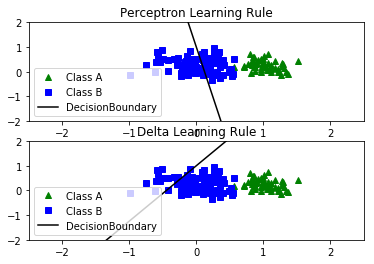

[[-0.00667369 -0.00081794  0.19120787]]


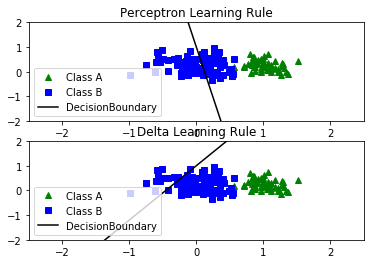

[[-0.00667369 -0.00081794  0.19120787]]


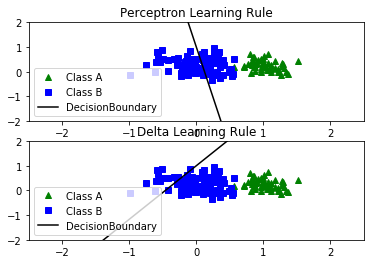

[[-0.00667369 -0.00081794  0.19120787]]


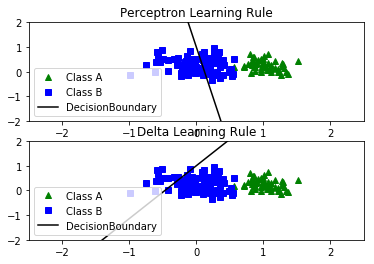

[[-0.00667369 -0.00081794  0.19120787]]


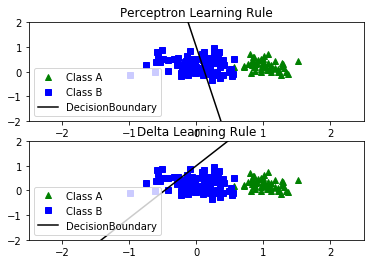

[[-0.00667369 -0.00081794  0.19120787]]


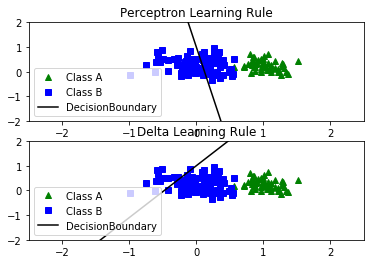

[[-0.00667369 -0.00081794  0.19120787]]


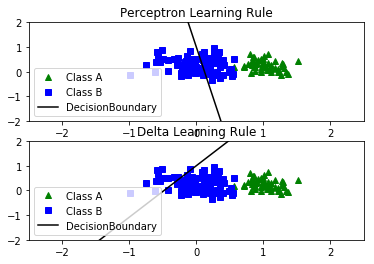

[[-0.00667369 -0.00081794  0.19120787]]


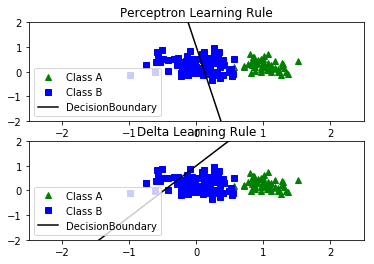

[[-0.00667369 -0.00081794  0.19120787]]


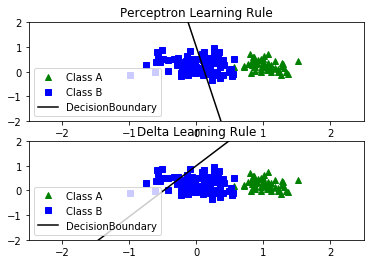

[[4.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [1.01783361 0.82419716 0.66740002 0.54043351 0.43762235 0.35437098
  0.28695816 0.2323706  0.18816828 0.15237543 0.12339214 0.09992288
  0.08091862 0.06552989 0.05306883 0.04297845 0.03480774 0.02819147
  0.02283392 0.0184956 ]]


In [193]:
eta = 1e-3
epochs = 20
n_outputs = 1
n_dim = 3
scale = 1e-2
n = 1000
X, T = generatePattern(n,pattern=1)
#print(X)
W = weights_init(n_outputs,n_dim,scale)
W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)
print(errors)

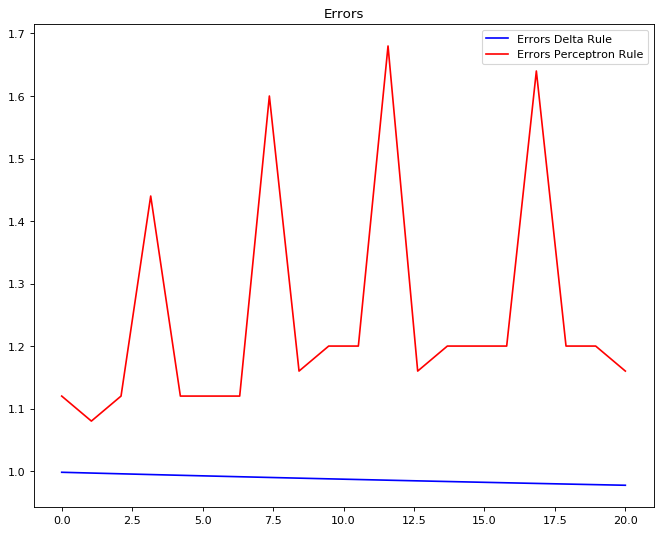

In [107]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt_errs_perceptron, = plt.plot(np.linspace(0,epochs,epochs),errors[0][:],'r', label='Errors Perceptron Rule')
plt_errs_delta_rule, = plt.plot(np.linspace(0,epochs,epochs),errors[1][:],'b',label='Errors Delta Rule')
#fig.add_plot(plt_errs_perceptron)
plt.legend(handles=[plt_errs_delta_rule,plt_errs_perceptron])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()